In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.utils import to_dense_adj
torch.manual_seed(2020)
from torch_geometric.data import Data
from torch_geometric.nn import GATConv, GATv2Conv
from torch_geometric.datasets import Planetoid
import torch_geometric.transforms as T
import pandas as pd
import matplotlib.pyplot as plt
from model import *

In [2]:
dt_name = 'Cora'
dataset = Planetoid(root=".", name=dt_name)
data = dataset[0]
hid = 16
heads = [1,2,4,8,16]
iter = 100
epoch_list = [i for i in range(iter)]
layer=1


In [3]:
def get_flatten(layer_type='normal'):
    att_all_heads = []
    fea_all_heads = []
    att_all_heads1 = []
    att_all_heads2 = []
    df= pd.DataFrame(columns=['Data', 'Iter', 
                            'Hidden', 'Head', 
                            'TrainLoss', 'TrainAcc',
                            'TestAcc', 'Layer'])
    for head in heads:
        if layer_type == 'v2':
            gat = GAT_AT(dataset.num_features, hid, dataset.num_classes, head, layer, layer_type)
        else:
            gat = GAT_AT(dataset.num_features, hid, dataset.num_classes, head, layer)

        model, att1, x, att_list, feature_list= train(gat, data, iter, df, dt_name, hid, head, layer, epoch_list)
        if layer == 2:
            att_all_heads1.append(att_list[0])
            att_all_heads2.append(att_list[1])
        elif layer == 1:
            att_all_heads.append(att_list)
        fea_all_heads.append(feature_list)
    
    if layer == 2:
        flat_fea_heads = flatten_fea(fea_all_heads)
        flat_att_heads1 = flatten_att(att_all_heads1)
        flat_att_heads2 = flatten_att(att_all_heads2)
        return df, flat_fea_heads, flat_att_heads1, flat_att_heads2
    
    elif layer == 1:
        flat_fea_heads = flatten_fea(fea_all_heads)
        flat_att_head = flatten_att(att_all_heads)
        return df, flat_fea_heads, flat_att_head


In [4]:
heads = [1,2,4,8,16]
layer = 1
l1_n_df, l1_n_flat_fea_heads, l1_n_flat_att_head = get_flatten('noraml')

In [7]:
layer = 2
l2_n_df, l2_n_flat_fea_heads, l2_n_flat_att_head1, l2_n_flat_att_head2 = get_flatten()

In [15]:
l1_n_df[l1_n_df.groupby(['Head'])['TestAcc'].transform(max) == l1_n_df['TestAcc']]

,Data,Iter,Hidden,Head,TrainLoss,TrainAcc,TestAcc,Layer
21,Cora,21,16,1,0.822089,98.571426,72.700000,1
150,Cora,50,16,2,0.186006,100.000000,73.199999,1
227,Cora,27,16,4,0.600695,99.285716,76.400000,1
228,Cora,28,16,4,0.567921,99.285716,76.400000,1
229,Cora,29,16,4,0.536777,99.285716,76.400000,1
322,Cora,22,16,8,0.837024,99.285716,75.400001,1
323,Cora,23,16,8,0.799097,99.285716,75.400001,1
325,Cora,25,16,8,0.727368,99.285716,75.400001,1
330,Cora,30,16,8,0.571322,99.285716,75.400001,1
334,Cora,34,16,8,0.469180,99.285716,75.400001,1


In [16]:
l2_n_df[l2_n_df.groupby(['Head'])['TestAcc'].transform(max) == l2_n_df['TestAcc']]


,Data,Iter,Hidden,Head,TrainLoss,TrainAcc,TestAcc,Layer
25,Cora,25,16,1,0.236144,99.285716,78.399998,2
26,Cora,26,16,1,0.207680,99.285716,78.399998,2
28,Cora,28,16,1,0.160575,99.285716,78.399998,2
120,Cora,20,16,2,0.162608,98.571426,79.200000,2
221,Cora,21,16,4,0.028662,100.000000,78.399998,2
222,Cora,22,16,4,0.022302,100.000000,78.399998,2
390,Cora,90,16,8,0.006901,100.000000,79.600000,2
404,Cora,4,16,16,0.707058,97.142857,80.699998,2


In [10]:
l1_n_df.groupby(['Head'])

/Users/claire/Desktop/grl/gat/model.py:110: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for key, grp in df.groupby(['Head']):
/Users/claire/Desktop/grl/gat/model.py:110: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for key, grp in df.groupby(['Head']):


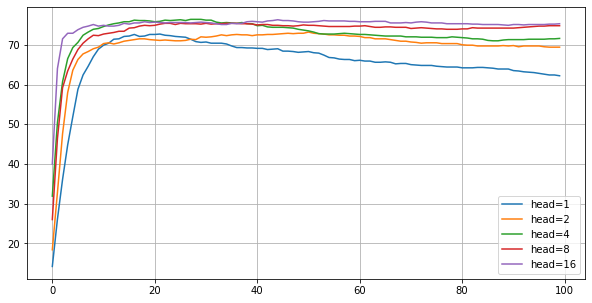

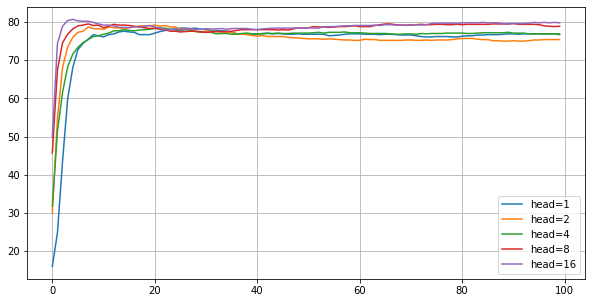

In [19]:
# viz_loss_or_acc(l1_n_df, 'TrainAcc')
viz_loss_or_acc(l1_n_df, 'TestAcc')
# viz_loss_or_acc(l2_n_df, 'TrainAcc')
viz_loss_or_acc(l2_n_df, 'TestAcc')


/Users/claire/Desktop/grl/gat/model.py:110: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for key, grp in df.groupby(['Head']):
/Users/claire/Desktop/grl/gat/model.py:110: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for key, grp in df.groupby(['Head']):


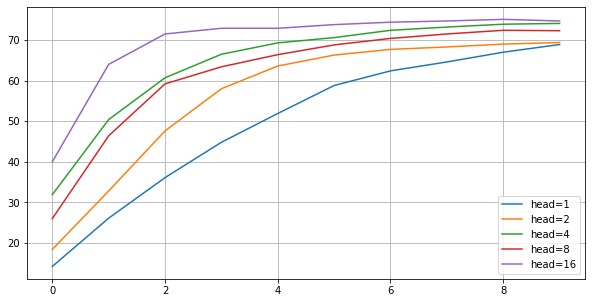

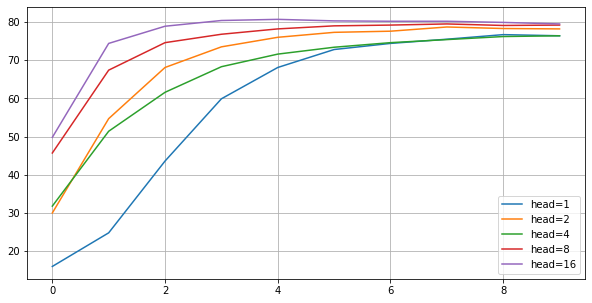

In [18]:

viz_loss_or_acc(l1_n_df, 'TestAcc', 10)

viz_loss_or_acc(l2_n_df, 'TestAcc',10)

In [34]:
layer = 1

l1_v2_df, l1_v2_flat_fea_heads, l1_v2_flat_att_head = get_flatten('v2')

/Users/claire/Desktop/grl/gat/model.py:110: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for key, grp in df.groupby(['Head']):


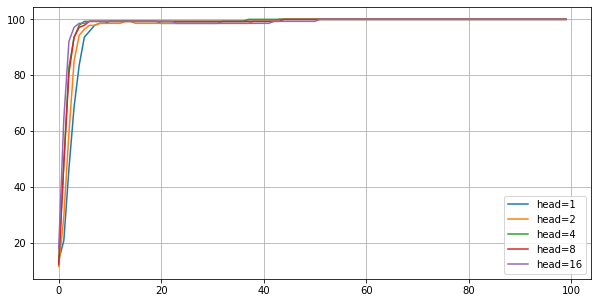

In [6]:
viz_loss_or_acc(l1_n_df, 'TrainAcc')
# viz_loss_or_acc(l1_v2_df, 'TestAcc')

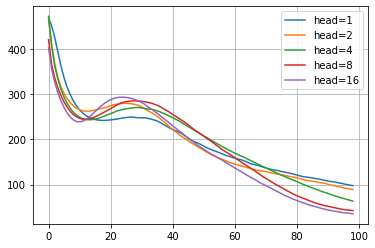

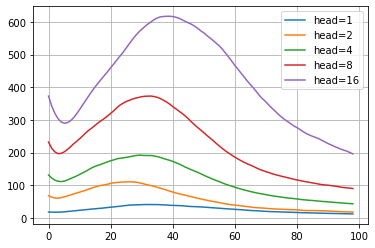

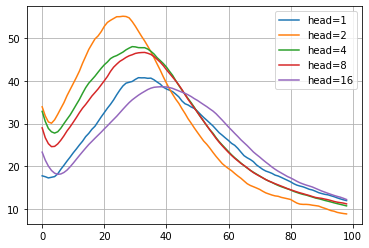

In [35]:
viz_feature_variation(l1_v2_flat_fea_heads, heads)
viz_feature_variation(l1_v2_flat_att_head, heads)
viz_att_variation(l1_v2_flat_att_head, heads)

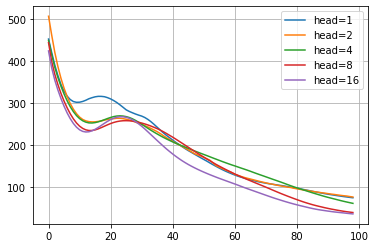

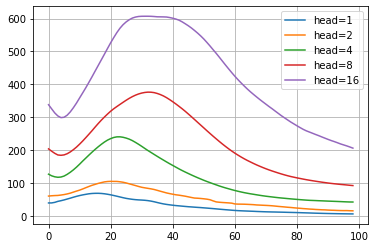

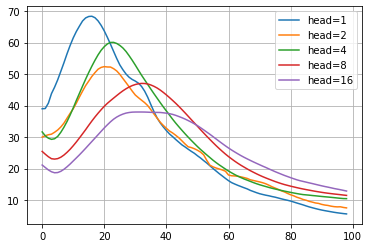

In [29]:
viz_feature_variation(l1_n_flat_fea_heads, heads)
viz_feature_variation(l1_n_flat_att_head, heads)
viz_att_variation(l1_n_flat_att_head, heads)

In [30]:
layer = 2
# l2_v2_df, l2_v2_flat_fea_heads, l2_v2_flat_att_head1, l2_v2_flat_att_head2 = get_flatten('v2')
l2_n_df, l2_n_flat_fea_heads, l2_n_flat_att_head1, l2_n_flat_att_head2 = get_flatten()

In [21]:
l2_n_df

,Data,Iter,Hidden,Head,TrainLoss,TrainAcc,TestAcc,Layer
0,Cora,0,16,1,2.019204,12.857144,16.000000,2
1,Cora,1,16,1,1.924143,22.142857,24.800000,2
2,Cora,2,16,1,1.843173,37.142858,43.599999,2
3,Cora,3,16,1,1.755338,64.999998,59.899998,2
4,Cora,4,16,1,1.665072,86.428571,68.099999,2
...,...,...,...,...,...,...,...,...
495,Cora,95,16,16,0.006386,100.000000,79.799998,2
496,Cora,96,16,16,0.006368,100.000000,79.900002,2
497,Cora,97,16,16,0.006350,100.000000,79.799998,2
498,Cora,98,16,16,0.006332,100.000000,79.900002,2


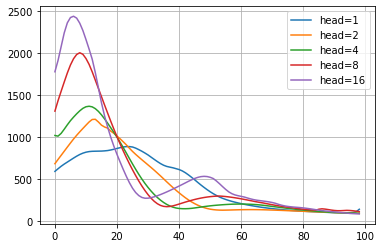

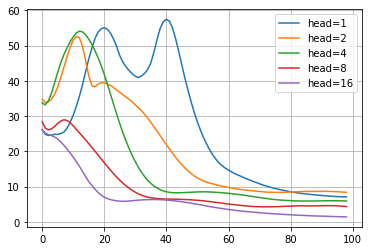

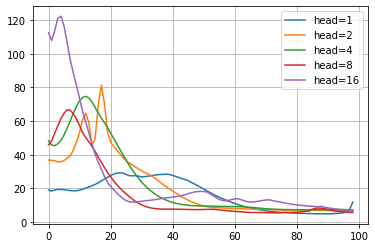

In [31]:
viz_feature_variation(l2_n_flat_fea_heads, heads)
viz_att_variation(l2_n_flat_att_head1, heads)
viz_feature_variation(l2_n_flat_att_head2, heads)

In [32]:
l2_v2_df, l2_v2_flat_fea_heads, l2_v2_flat_att_head1, l2_v2_flat_att_head2 = get_flatten('v2')


In [36]:
def viz_feature_variation(flat_fea_heads, heads):
    plt.figure()
    for i in range(len(heads)):
        plt.plot(np.sum(np.abs(np.diff(np.array(flat_fea_heads[i]), axis=0)),axis=1)[:10], label=f'head={heads[i]}')
        plt.grid()
    plt.legend()

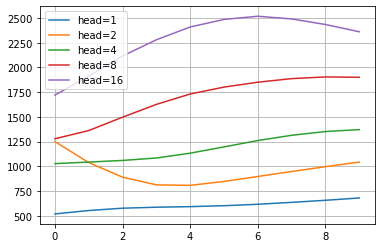

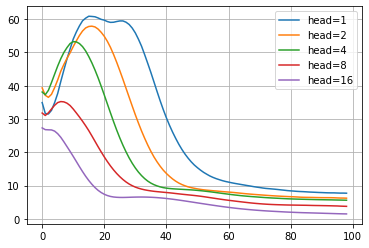

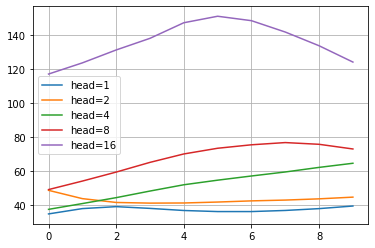

In [37]:
viz_feature_variation(l2_v2_flat_fea_heads, heads)
viz_att_variation(l2_v2_flat_att_head1, heads)
viz_feature_variation(l2_v2_flat_att_head2, heads)

In [9]:
flat_att_heads1_v2 = flatten_att(att_all_heads1_v2)
flat_att_heads2_v2 = flatten_att(att_all_heads2_v2)
flat_fea_heads_v2 = flatten_fea(fea_all_heads_v2)

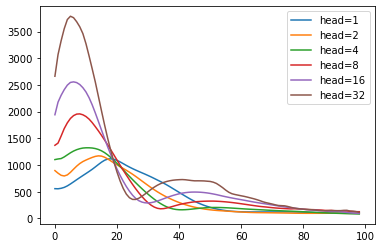

In [24]:
viz_feature_variation(flat_fea_heads_v2)

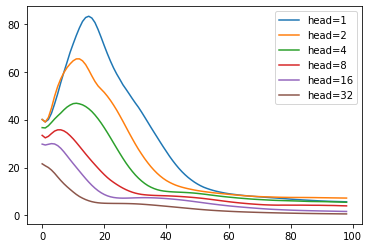

In [23]:
viz_att_variation(flat_att_heads1_v2)